# Import Library

In [18]:
import gymnasium as gym
import numpy as np
import torch

## Parameters and environment

In [19]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
if torch.backends.cudnn.enabled:
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

epsilon = 0.0005
batch_size = 32  
update_frequency = 150
nframes = 15000 
memory = 1500



# environment
# We use CartPole-v1 from OPENAI Gymnasium's repository
environment = gym.make("CartPole-v1", max_episode_steps=200, render_mode="rgb_array")

###  Function for training and testing each extension and rainbow

In [20]:
from utils.DQN import DQNAgent  

def train_and_test_agent(Agent,environment, memory, batch_size, update_frequency, num_frames, video_folder, epsilon=None, seed=42):
    """
    Initializes, trains and tests a DQN agent on a specified environment.
    
    Args:
        Agent : The agent class to be used.
        environment: The environment on which the agent will be trained and tested.
        memory: The size of the repetition memory.
        batch_size: The batch size for sampling.
        update_frequency: Update frequency of the target network.
        num_frames: Number of frames for training.
        video_folder: Folder where to store the video of the test episode.
        epsilon: Epsilon decay rate. Pass None for noisy networks.
        seed: Random seed for reproducibility.
    """
    # Agent initialisation with or without epsilon based on agent type
    if epsilon is not None:
        agent = Agent(environment, memory, batch_size, update_frequency, epsilon, seed)
    else:
        # For Noisy Nets, where epsilon is not applied
        agent = Agent(environment, memory, batch_size, update_frequency, seed=seed)

    # Agent training
    scores, losses = agent.train(num_frames)

    # Test the agent and store an episode on video
    agent.test(video_folder=video_folder)
    return scores, losses

## DQN

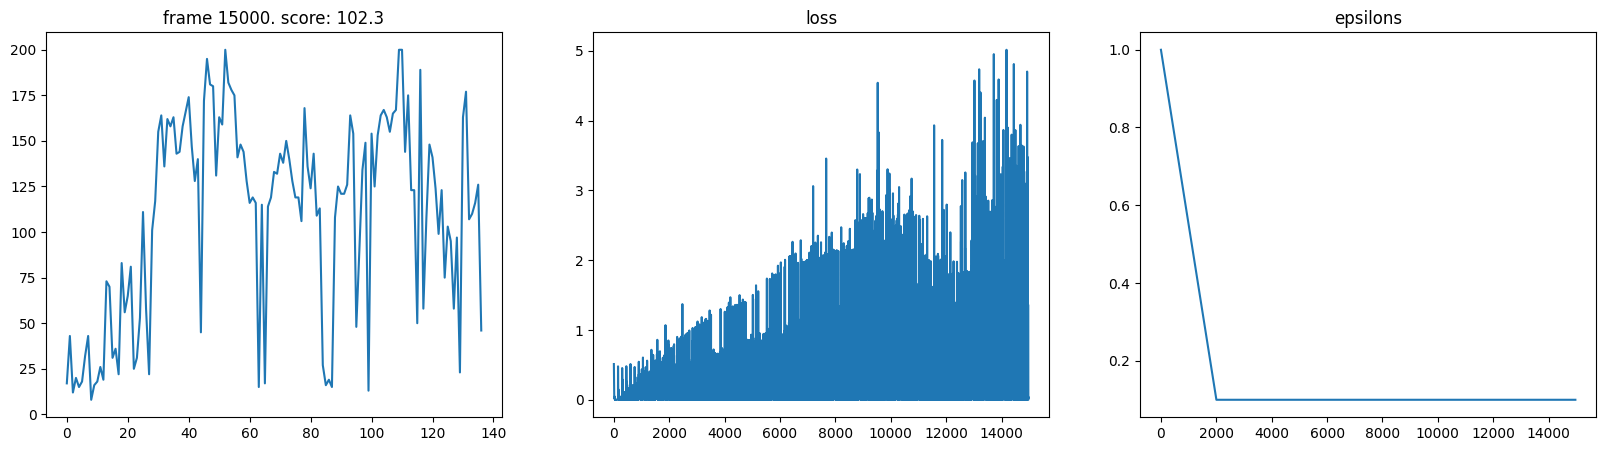

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\dqn folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4
score:  90.0


In [21]:
from utils.DQN import DQNAgent

# DQN
scores_dqn, losses_dqn = train_and_test_agent(DQNAgent, environment, memory, batch_size, update_frequency, nframes, "results/dqn", epsilon=epsilon)


# DDQN

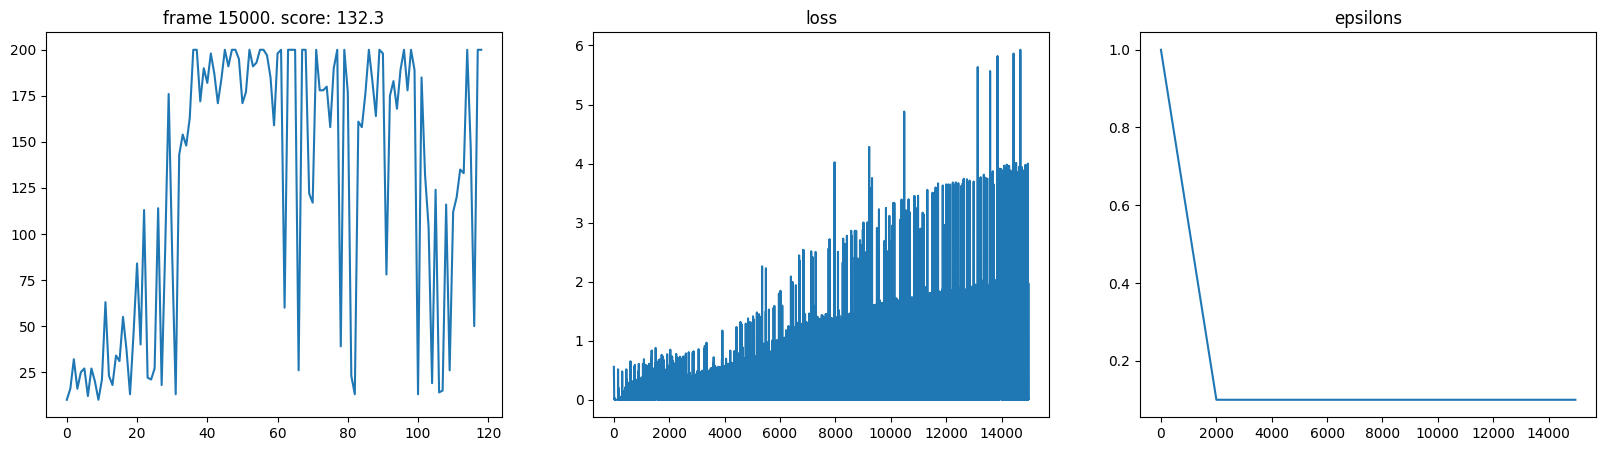

Moviepy - Building video c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4
score:  200.0


In [22]:
from utils.DDQN import DDQNAgent

scores_ddqn , losses_ddqn =train_and_test_agent(DDQNAgent,environment, memory, batch_size, update_frequency, nframes, "results/dqn", epsilon=epsilon)


# Prioritized DDQN

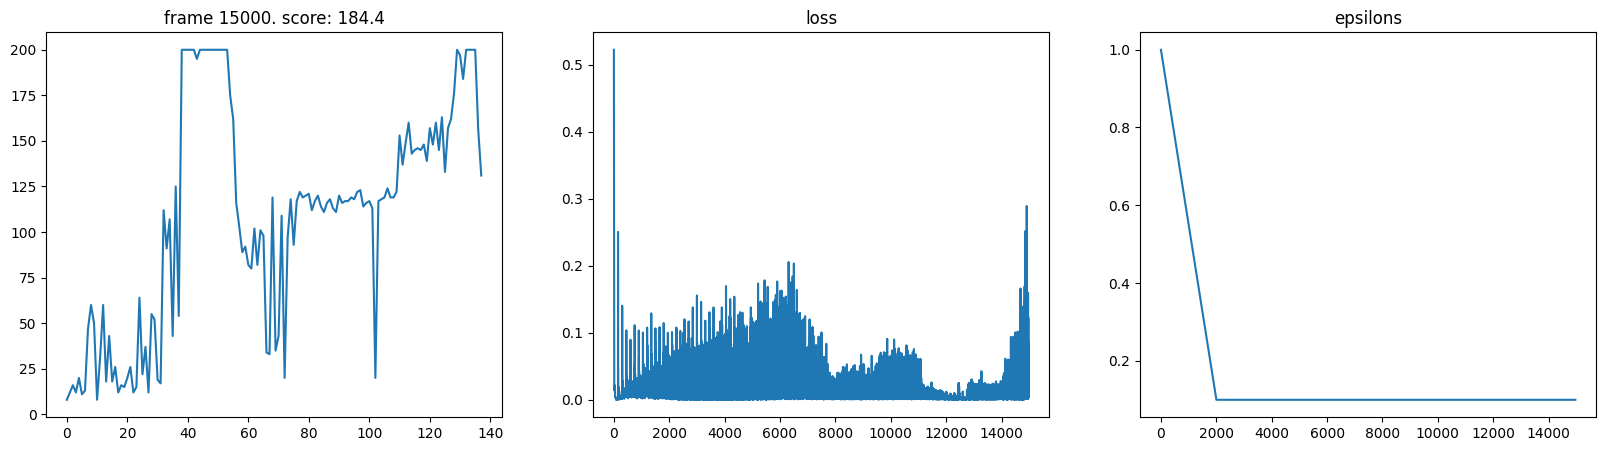

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\PER folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\PER\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\PER\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\PER\rl-video-episode-0.mp4
score:  14.0


In [23]:
from utils.PER import PERAgent

scores_per, losses_per =train_and_test_agent(PERAgent, environment, memory, batch_size, update_frequency, nframes, "results/PER", epsilon=epsilon)


# Dueling DDQN

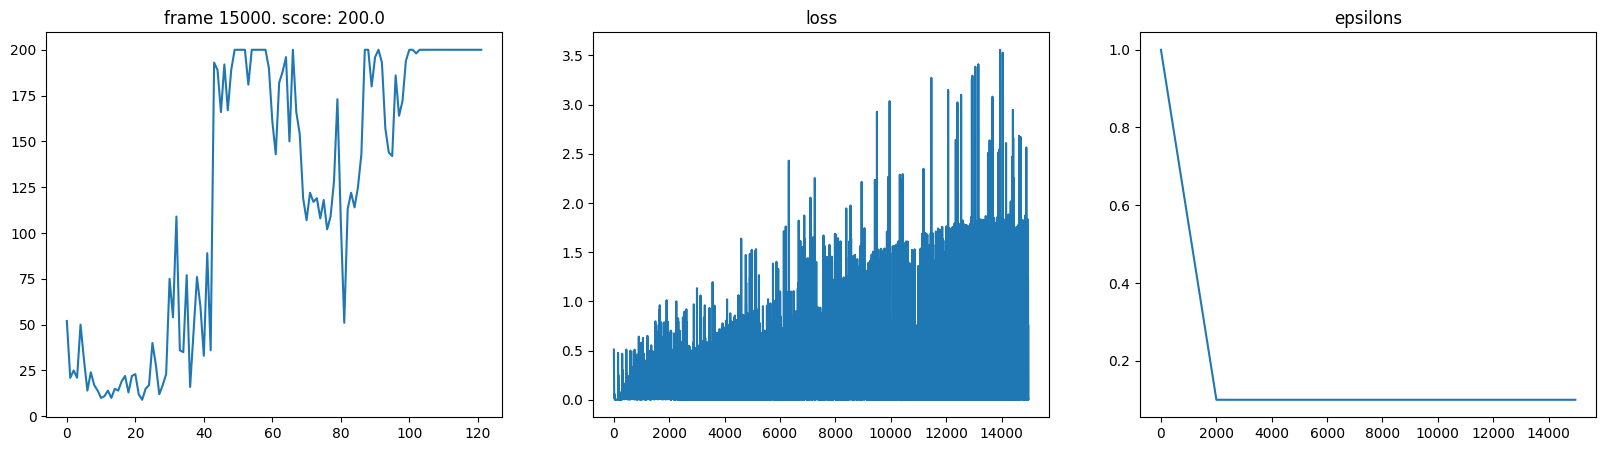

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\DUELLING folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\DUELLING\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\DUELLING\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\DUELLING\rl-video-episode-0.mp4
score:  200.0


In [24]:
from utils.DUELLING import DUELLINGAgent

scores_duelling, losses_duelling =train_and_test_agent(DUELLINGAgent, environment, memory, batch_size, update_frequency, nframes, "results/DUELLING", epsilon=epsilon)


# Multi-step learning

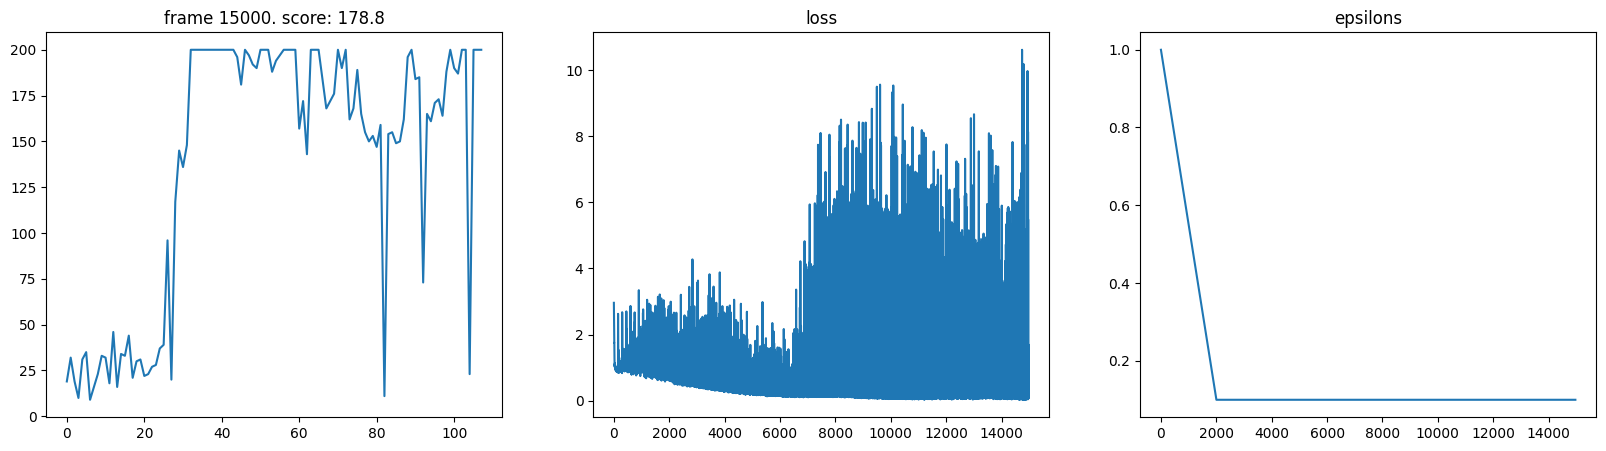

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\MULTISTEP folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\MULTISTEP\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\MULTISTEP\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\MULTISTEP\rl-video-episode-0.mp4
score:  200.0


In [25]:
from utils.MULTISTEP import MULTISTEPAgent

scores_multi, losses_multi =train_and_test_agent(MULTISTEPAgent, environment, memory, batch_size, update_frequency, nframes, "results/MULTISTEP", epsilon=epsilon)


# Distributional DQN

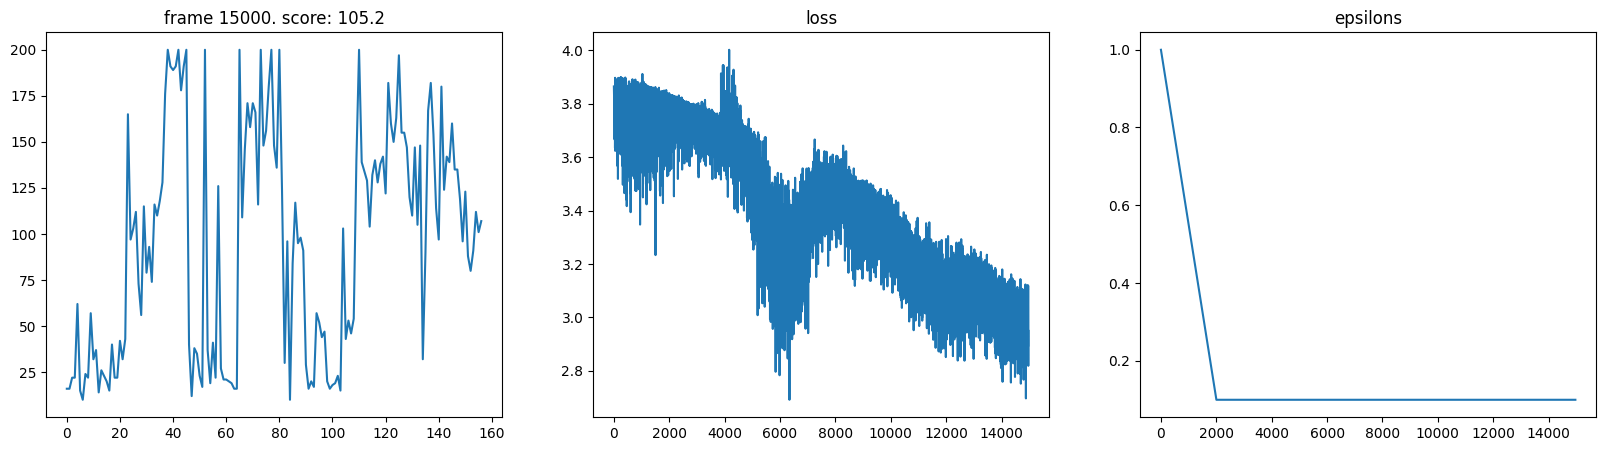

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\DISTRIBUTIONALDQN folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\DISTRIBUTIONALDQN\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\DISTRIBUTIONALDQN\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\DISTRIBUTIONALDQN\rl-video-episode-0.mp4
score:  87.0


In [26]:
from utils.DISTRIBUTIONALDQN import DISTRIBUTIONALDQNAgent

scores_dist, losses_dist = train_and_test_agent(DISTRIBUTIONALDQNAgent, environment, memory, batch_size, update_frequency, nframes, "results/DISTRIBUTIONALDQN", epsilon=epsilon)


# Noisy DQN


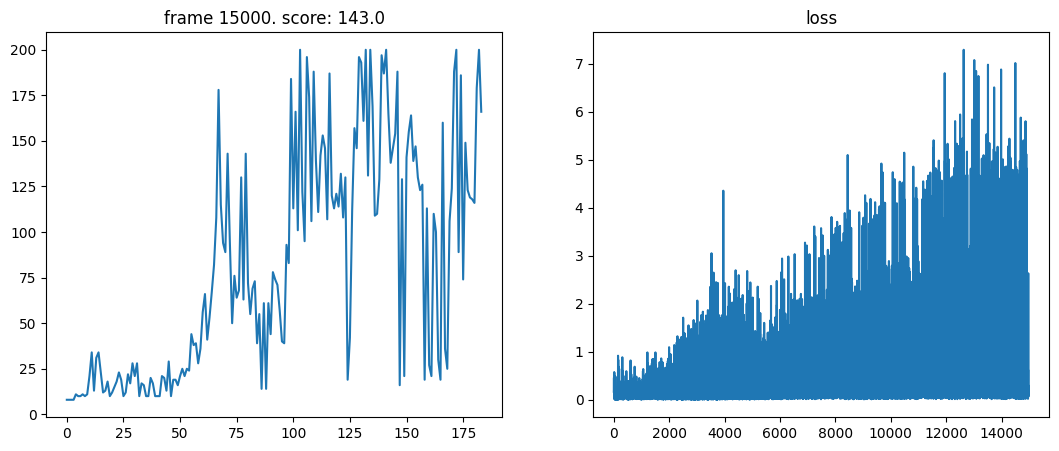

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\NOISYDQN folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\NOISYDQN\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\NOISYDQN\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\NOISYDQN\rl-video-episode-0.mp4
score:  200.0


In [27]:
from utils.NOISYDQN import NOISYDQNAgent

scores_noisy, losses_noisy =train_and_test_agent(NOISYDQNAgent, environment, memory, batch_size, update_frequency, nframes, "results/NOISYDQN", epsilon=None)



# Rainbow

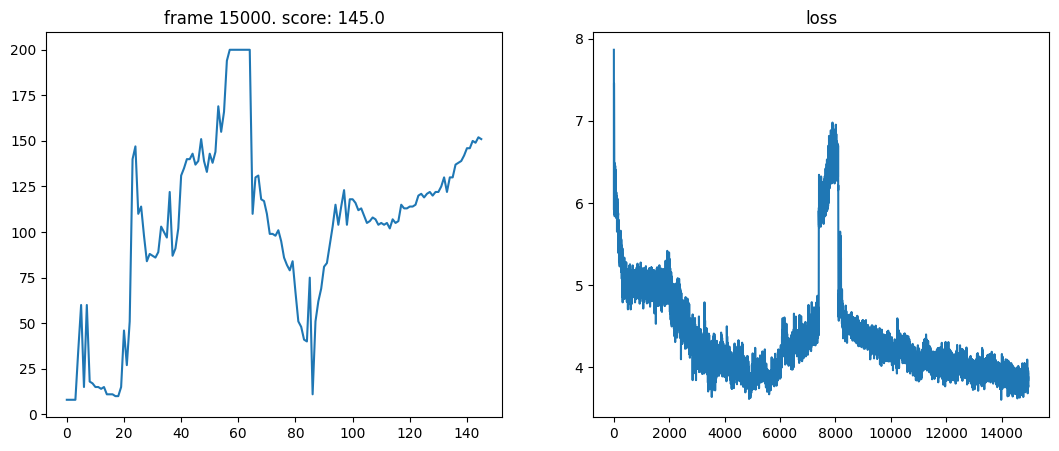

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\RAINBOW folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\RAINBOW\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\RAINBOW\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\RAINBOW\rl-video-episode-0.mp4
score:  151.0


In [34]:
from utils.RAINBOW import RAINBOWAgent

scores_rainbow , losses_rainbow = train_and_test_agent(RAINBOWAgent, environment, memory, batch_size, update_frequency, nframes, "results/RAINBOW", epsilon=None)

# combined graph

## Loss curve

In [ ]:
import matplotlib.pyplot as plt


# Création de la figure et de l'axe
plt.figure(figsize=(10, 6))

# plot loss curv
plt.plot(losses_dqn, label='DQN')
plt.plot(losses_ddqn, label='DDQN')
plt.plot(losses_per, label='Prioritized DDQN')
plt.plot(losses_duelling, label='Dueling DDQN')
plt.plot(losses_multi, label='Multi-step learning')
plt.plot(losses_dist, label='Distributional DQN')
plt.plot(losses_noisy, label='Noisy DQN')
plt.plot(losses_rainbow, label='Rainbow')

# add title and labels
plt.title('Comparison of Loss Curves for DQN Extensions')
plt.xlabel('Training Frames')
plt.ylabel('Loss')
plt.legend()

# show the plot
plt.show()
plt.savefig('results/losses.png')

In [39]:
def exponential_smoothing(scores, alpha=0.3):
    """Apply exponential smoothing with a higher alpha for more sensitivity to recent changes."""
    smoothed = np.zeros_like(scores)
    smoothed[0] = scores[0]
    for t in range(1, len(scores)):
        smoothed[t] = alpha * scores[t] + (1 - alpha) * smoothed[t-1]
    return smoothed

# Assuming normalize_scores function and score arrays (scores_dqn, etc.) are defined elsewhere

# normalized score
scores_dqn_normalized = normalize_scores(scores_dqn)
scores_ddqn_normalized = normalize_scores(scores_ddqn)
scores_per_normalized = normalize_scores(scores_per)
scores_duelling_normalized = normalize_scores(scores_duelling)
scores_multi_normalized = normalize_scores(scores_multi)
scores_dist_normalized = normalize_scores(scores_dist)
scores_noisy_normalized = normalize_scores(scores_noisy)
scores_rainbow_normalized = normalize_scores(scores_rainbow)

# smooth scores exponentially with adjusted alpha
scores_dqn_smoothed = exponential_smoothing(scores_dqn_normalized)
scores_ddqn_smoothed = exponential_smoothing(scores_ddqn_normalized)
scores_per_smoothed = exponential_smoothing(scores_per_normalized)
scores_duelling_smoothed = exponential_smoothing(scores_duelling_normalized)
scores_multi_smoothed = exponential_smoothing(scores_multi_normalized)
scores_dist_smoothed = exponential_smoothing(scores_dist_normalized)
scores_noisy_smoothed = exponential_smoothing(scores_noisy_normalized)
scores_rainbow_smoothed = exponential_smoothing(scores_rainbow_normalized)

# Continue with the plotting as previously


## Score curve

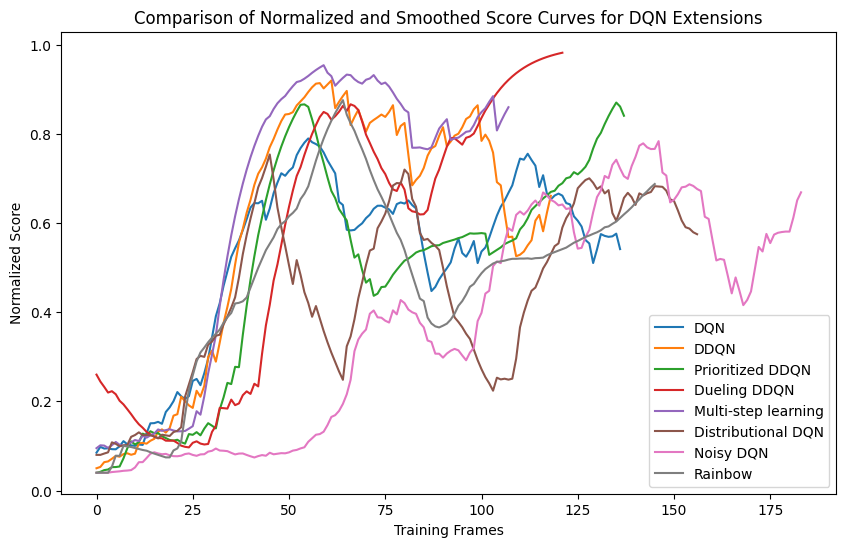

<Figure size 640x480 with 0 Axes>

In [44]:
    def exponential_smoothing(scores, alpha=0.1):
        """Applied a exponential smoothing."""
        smoothed = np.zeros_like(scores)
        smoothed[0] = scores[0]
        for t in range(1, len(scores)):
            smoothed[t] = alpha * scores[t] + (1 - alpha) * smoothed[t-1]
        return smoothed

    # normalized score
    scores_dqn_normalized = normalize_scores(scores_dqn)
    scores_ddqn_normalized = normalize_scores(scores_ddqn)
    scores_per_normalized = normalize_scores(scores_per)
    scores_duelling_normalized = normalize_scores(scores_duelling)
    scores_multi_normalized = normalize_scores(scores_multi)
    scores_dist_normalized = normalize_scores(scores_dist)
    scores_noisy_normalized = normalize_scores(scores_noisy)
    scores_rainbow_normalized = normalize_scores(scores_rainbow)

    # smooth scores exponentialy
    scores_dqn_smoothed = exponential_smoothing(scores_dqn_normalized)
    scores_ddqn_smoothed = exponential_smoothing(scores_ddqn_normalized)
    scores_per_smoothed = exponential_smoothing(scores_per_normalized)
    scores_duelling_smoothed = exponential_smoothing(scores_duelling_normalized)
    scores_multi_smoothed = exponential_smoothing(scores_multi_normalized)
    scores_dist_smoothed = exponential_smoothing(scores_dist_normalized)
    scores_noisy_smoothed = exponential_smoothing(scores_noisy_normalized)
    scores_rainbow_smoothed = exponential_smoothing(scores_rainbow_normalized)

    # axe creation
    plt.figure(figsize=(10, 6))

    # plot each score curve smoothed
    plt.plot(scores_dqn_smoothed, label='DQN')
    plt.plot(scores_ddqn_smoothed, label='DDQN')
    plt.plot(scores_per_smoothed, label='Prioritized DDQN')
    plt.plot(scores_duelling_smoothed, label='Dueling DDQN')
    plt.plot(scores_multi_smoothed, label='Multi-step learning')
    plt.plot(scores_dist_smoothed, label='Distributional DQN')
    plt.plot(scores_noisy_smoothed, label='Noisy DQN')
    plt.plot(scores_rainbow_smoothed, label='Rainbow')

    # Add titles and labels
    plt.title('Comparison of Normalized and Smoothed Score Curves for DQN Extensions')
    plt.xlabel('Training Frames')
    plt.ylabel('Normalized Score')
    plt.legend()

    # Show the plot
    plt.show()
    plt.savefig('results/score.png')

# Median

In [46]:
# Scores of each agent
scores = {
    'DQN': scores_dqn,
    'DDQN': scores_ddqn,
    'Prioritized DDQN': scores_per,
    'Dueling DDQN': scores_duelling,
    'Multi-step learning': scores_multi,
    'Distributional DQN': scores_dist,
    'Noisy DQN': scores_noisy,
    'Rainbow': scores_rainbow
}

# Calculate the median for each agent
medians = {agent: np.median(agent_scores) for agent, agent_scores in scores.items()}

# Print the medians
for agent, median in medians.items():
    print(f'{agent}: {median}')

# save in txt file medians
with open('results/medians.txt', 'w') as f:
    for agent, median in medians.items():
        f.write(f'{agent}: {median}\n')


DQN: 123.0
DDQN: 159.0
Prioritized DDQN: 117.0
Dueling DDQN: 143.0
Multi-step learning: 169.5
Distributional DQN: 101.0
Noisy DQN: 70.0
Rainbow: 109.5
